In [1]:
import nltk
from nltk.util import ngrams
from nltk.corpus import gutenberg

nltk.download('punkt')  # scarica il tokenizer di NLTK



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
import re
from nltk.util import ngrams

tokens = []

with open('hp7.txt', 'r') as file:
    # leggi il contenuto del file e salvalo in una stringa
    libroIntero = file.read()
    
    #pulisco
    libroIntero= libroIntero.lower()
    libroIntero = re.sub(r'[^a-zA-Z0-9\s]', ' ', libroIntero)
    # dividi la stringa in parole e salvale in una lista
    #words = file_contents.split(" ")
    

    parole = libroIntero.split(" ")
    #tokens = []

    for parola in parole:
        if parola != "" and  parola!="\n":
            if "\n" in parola:
            # string_with_newline = string_with_newline.replace("\n", "")
   
                tokens.append(parola.replace("\n", ""))
            else:
                tokens.append(parola)

    #tokens = [token for token in file_contents.split(" ") if token != "" token.startswith('\n')]
output = list(ngrams(tokens, 3))

In [3]:
output

[('j', 'k', 'rowlingharry'),
 ('k', 'rowlingharry', 'potter'),
 ('rowlingharry', 'potter', 'e'),
 ('potter', 'e', 'idoni'),
 ('e', 'idoni', 'della'),
 ('idoni', 'della', 'morte'),
 ('della', 'morte', 'harry'),
 ('morte', 'harry', 'potter'),
 ('harry', 'potter', 'and'),
 ('potter', 'and', 'thedeathly'),
 ('and', 'thedeathly', 'hallows'),
 ('thedeathly', 'hallows', '2007'),
 ('hallows', '2007', 'nota'),
 ('2007', 'nota', 'allatraduzioneitaliana'),
 ('nota', 'allatraduzioneitaliana', 'la'),
 ('allatraduzioneitaliana', 'la', 'traduzione'),
 ('la', 'traduzione', 'di'),
 ('traduzione', 'di', 'un'),
 ('di', 'un', 'librotocca'),
 ('un', 'librotocca', 'corde'),
 ('librotocca', 'corde', 'sensibilissime'),
 ('corde', 'sensibilissime', 'nelcuore'),
 ('sensibilissime', 'nelcuore', 'e'),
 ('nelcuore', 'e', 'nella'),
 ('e', 'nella', 'mente'),
 ('nella', 'mente', 'dei'),
 ('mente', 'dei', 'lettori'),
 ('dei', 'lettori', 'sitratta'),
 ('lettori', 'sitratta', 'di'),
 ('sitratta', 'di', 'passare'),
 ('di

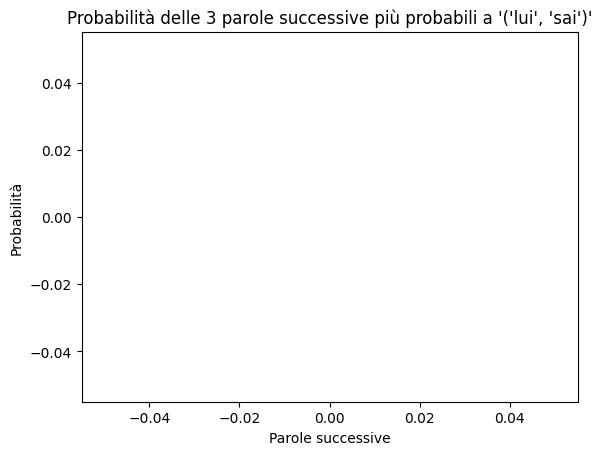

In [4]:
import nltk
from nltk.util import ngrams
from nltk.corpus import gutenberg
import matplotlib.pyplot as plt



# crea i trigrammi
trigrams = ngrams(output, 3)

# crea la ConditionalFreqDist
cfd = nltk.ConditionalFreqDist((tuple(trigram[:2]), trigram[2]) for trigram in trigrams)

# calcola le probabilità condizionate
cpd = nltk.ConditionalProbDist(cfd, nltk.MLEProbDist)

# parola da analizzare
word = 'chi'
prev_words = ('lui', 'sai')

# calcola le probabilità per ogni parola possibile
prob_dict = {}
for w in cpd[prev_words].samples():
    prob_dict[w] = cpd[prev_words].prob(w)

# estrai le 3 parole successive più probabili
top_words = sorted(prob_dict.items(), key=lambda x: x[1], reverse=True)[:3]

# crea un grafico a barre
plt.bar([w[0] for w in top_words], [w[1] for w in top_words])

# imposta i titoli
plt.title(f"Probabilità delle 3 parole successive più probabili a '{prev_words}'")
plt.xlabel('Parole successive')
plt.ylabel('Probabilità')

# visualizza il grafico
plt.show()


In [5]:
trigrams

In [6]:
import pandas as pd
from collections import Counter
c = Counter(output)
#c.most_common()[:20])
pd.DataFrame(c.most_common()[:40], columns = ['n-gram','Conteggio'])

,n-gram,Conteggio
0,"(ron, e, hermione)",53
1,"(tu, sai, chi)",35
2,"(godric, s, hollow)",35
3,"(la, bacchetta, di)",28
4,"(non, c, era)",26
5,"(si, guard, intorno)",25
6,"(a, godric, s)",23
7,"(voi, sapete, chi)",22
8,"(e, la, sua)",21
9,"(il, mantellodell, invisibilit)",21


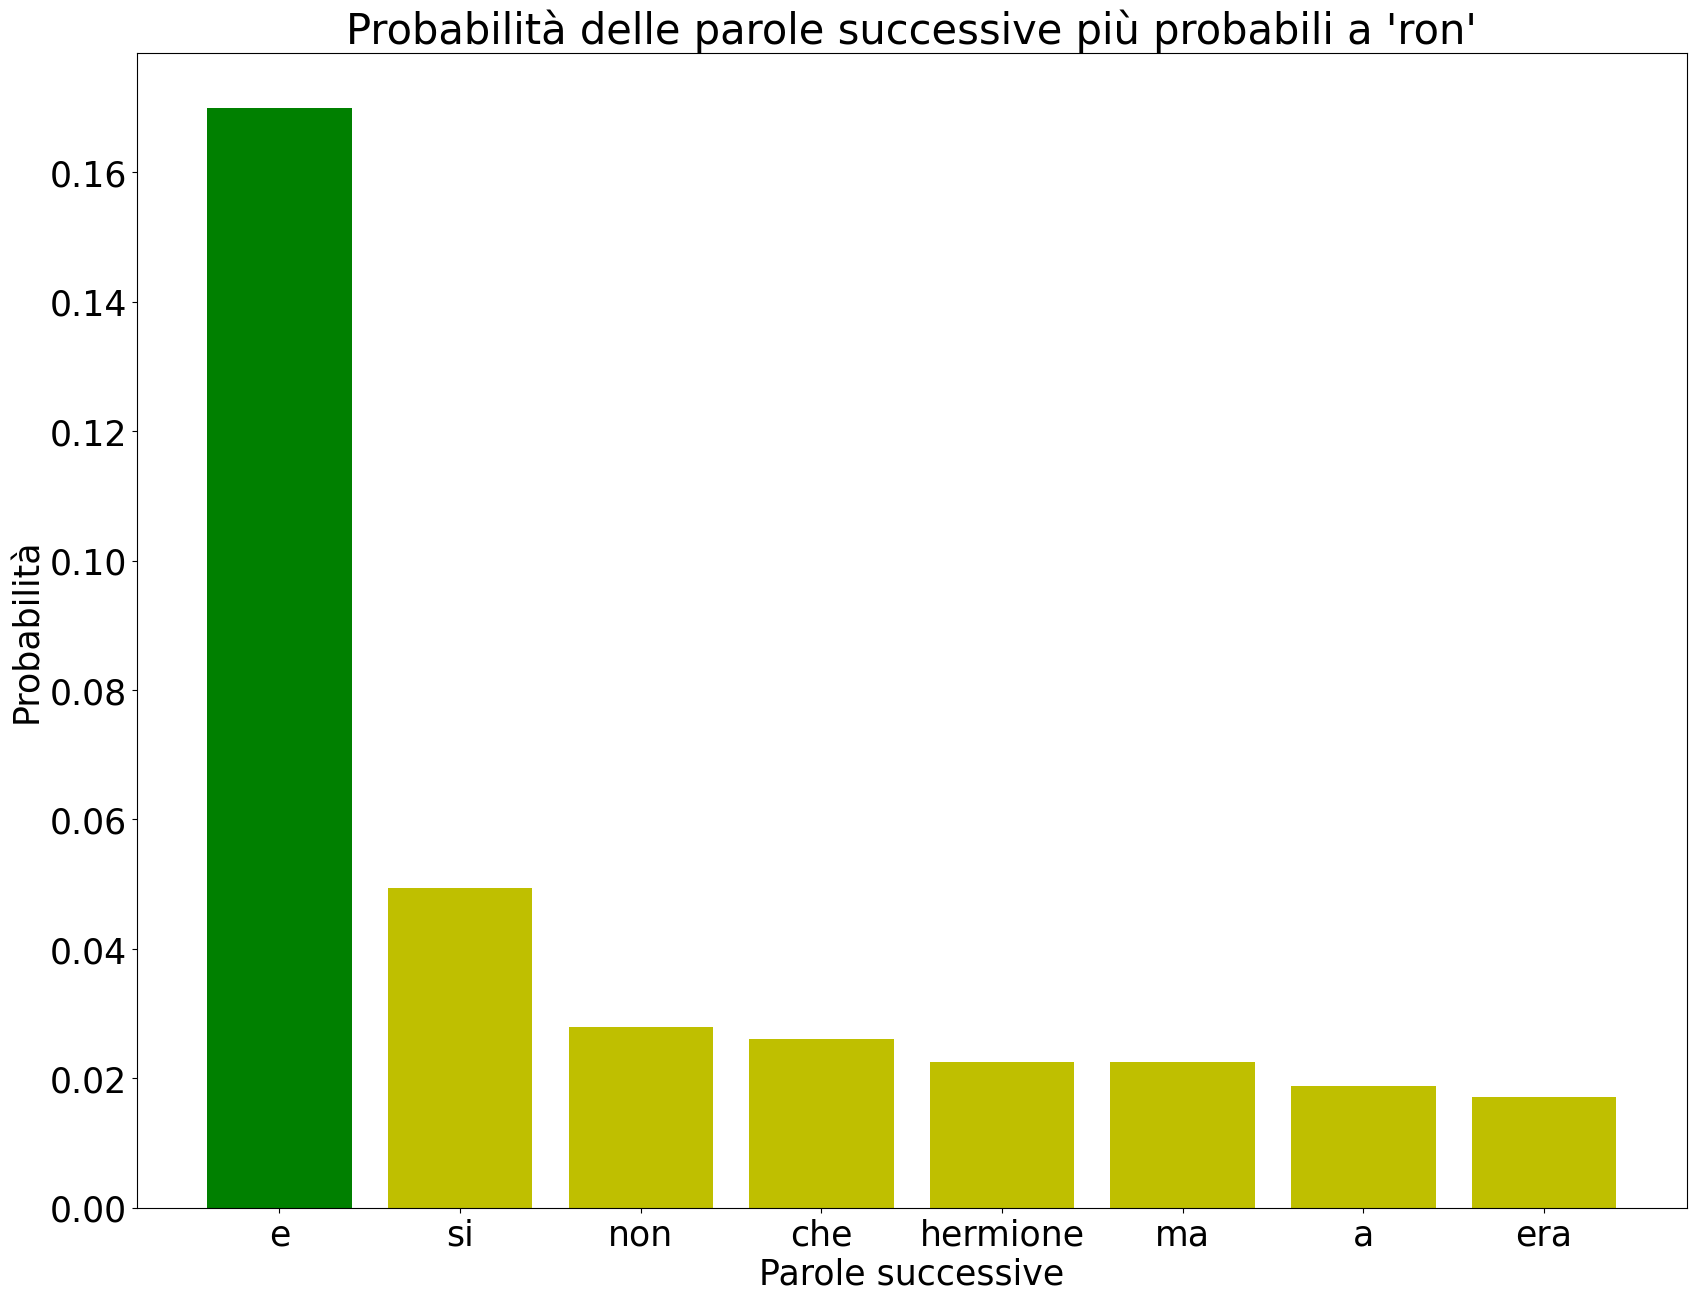

In [7]:
import nltk
from nltk.util import ngrams
import matplotlib.pyplot as plt

# carica il corpus di testo come stringa
with open('hp7.txt', 'r', encoding='utf8') as file:
    text = file.read()

# crea una lista di parole pulita dal testo
words = nltk.word_tokenize(text)
words = [word.lower() for word in words if word.isalpha()]

bigrams = ngrams(words, 2)
cfd = nltk.ConditionalFreqDist((bigram[0], bigram[1]) for bigram in bigrams)
cpd = nltk.ConditionalProbDist(cfd, nltk.MLEProbDist)

# parola da analizzare
word = 'hermione'
prev_words = ('ron')

# calcola le probabilità per ogni parola possibile
prob_dict = {}
for w in cpd[prev_words].samples():
    prob_dict[w] = cpd[prev_words].prob(w)

# estrai le 3 parole successive più probabili
top_words = sorted(prob_dict.items(), key=lambda x: x[1], reverse=True)[:8]


#ingrandisco il grafico
plt.figure(figsize=(20, 15))


plt.rcParams.update({'font.size': 25})



# imposta i titoli
plt.title(f"Probabilità delle parole successive più probabili a '{prev_words}'")
plt.xlabel('Parole successive')
plt.ylabel('Probabilità')

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.bar([w[0] for w in top_words], [w[1] for w in top_words], color=['g'] + ['y']*(len(top_words)-1))

# visualizza il grafico
plt.show()


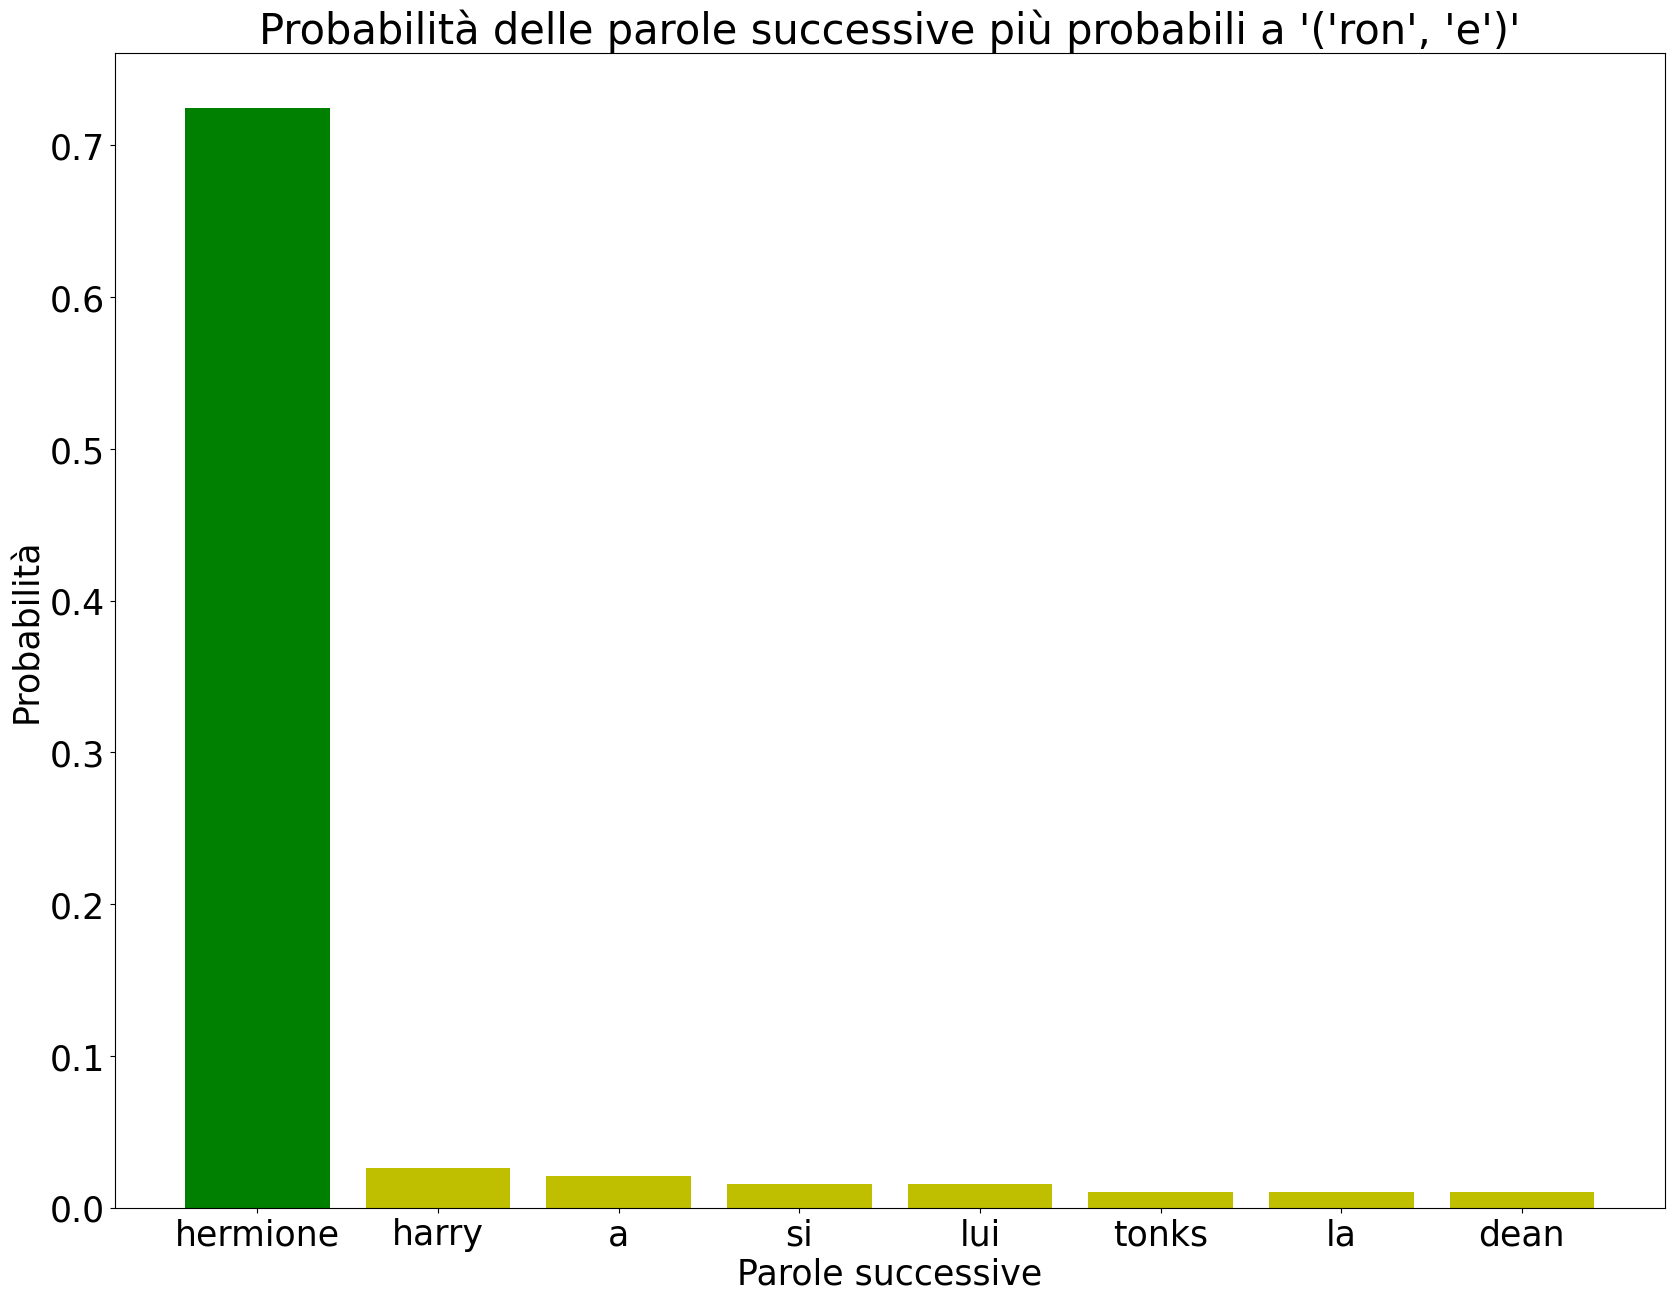

In [8]:
import nltk
from nltk.util import ngrams
import matplotlib.pyplot as plt

# carica il corpus di testo come stringa
with open('hp7.txt', 'r', encoding='utf8') as file:
    text = file.read()

# crea una lista di parole pulita dal testo
words = nltk.word_tokenize(text)
words = [word.lower() for word in words if word.isalpha()]

# crea i trigrammi
trigrams = ngrams(words, 3)

# crea la ConditionalFreqDist
cfd = nltk.ConditionalFreqDist((tuple(trigram[:2]), trigram[2]) for trigram in trigrams)

# calcola le probabilità condizionate
cpd = nltk.ConditionalProbDist(cfd, nltk.MLEProbDist)

# parola da analizzare
word = 'hermione'
prev_words = ('ron', 'e')

# calcola le probabilità per ogni parola possibile
prob_dict = {}
for w in cpd[prev_words].samples():
    prob_dict[w] = cpd[prev_words].prob(w)

# estrai le 3 parole successive più probabili
top_words = sorted(prob_dict.items(), key=lambda x: x[1], reverse=True)[:8]


#ingrandisco il grafico
plt.figure(figsize=(20, 15))


plt.rcParams.update({'font.size': 25})



# imposta i titoli
plt.title(f"Probabilità delle parole successive più probabili a '{prev_words}'")
plt.xlabel('Parole successive')
plt.ylabel('Probabilità')

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.bar([w[0] for w in top_words], [w[1] for w in top_words], color=['g'] + ['y']*(len(top_words)-1))

# visualizza il grafico
plt.show()


In [9]:
from nltk.probability import FreqDist

# Creazione dei trigrammi
trigrammi = ngrams(tokens, 5)

# Creazione dell'oggetto FreqDist
frequenze_trigrammi = FreqDist(trigrammi)

# Stampa delle frequenze dei trigrammi
print(frequenze_trigrammi)

# Parola di ricerca
parola = "harry"

# Conteggio delle frequenze dei trigrammi che contengono la parola
frequenze_parola = sum(frequenze_trigrammi[gram] for gram in frequenze_trigrammi if parola in gram)

# Stampa della frequenza della parola nei trigrammi
print(f"Frequenza della parola '{parola}' nei trigrammi: {frequenze_parola}")

<FreqDist with 159605 samples and 159810 outcomes>
Frequenza della parola 'harry' nei trigrammi: 11808


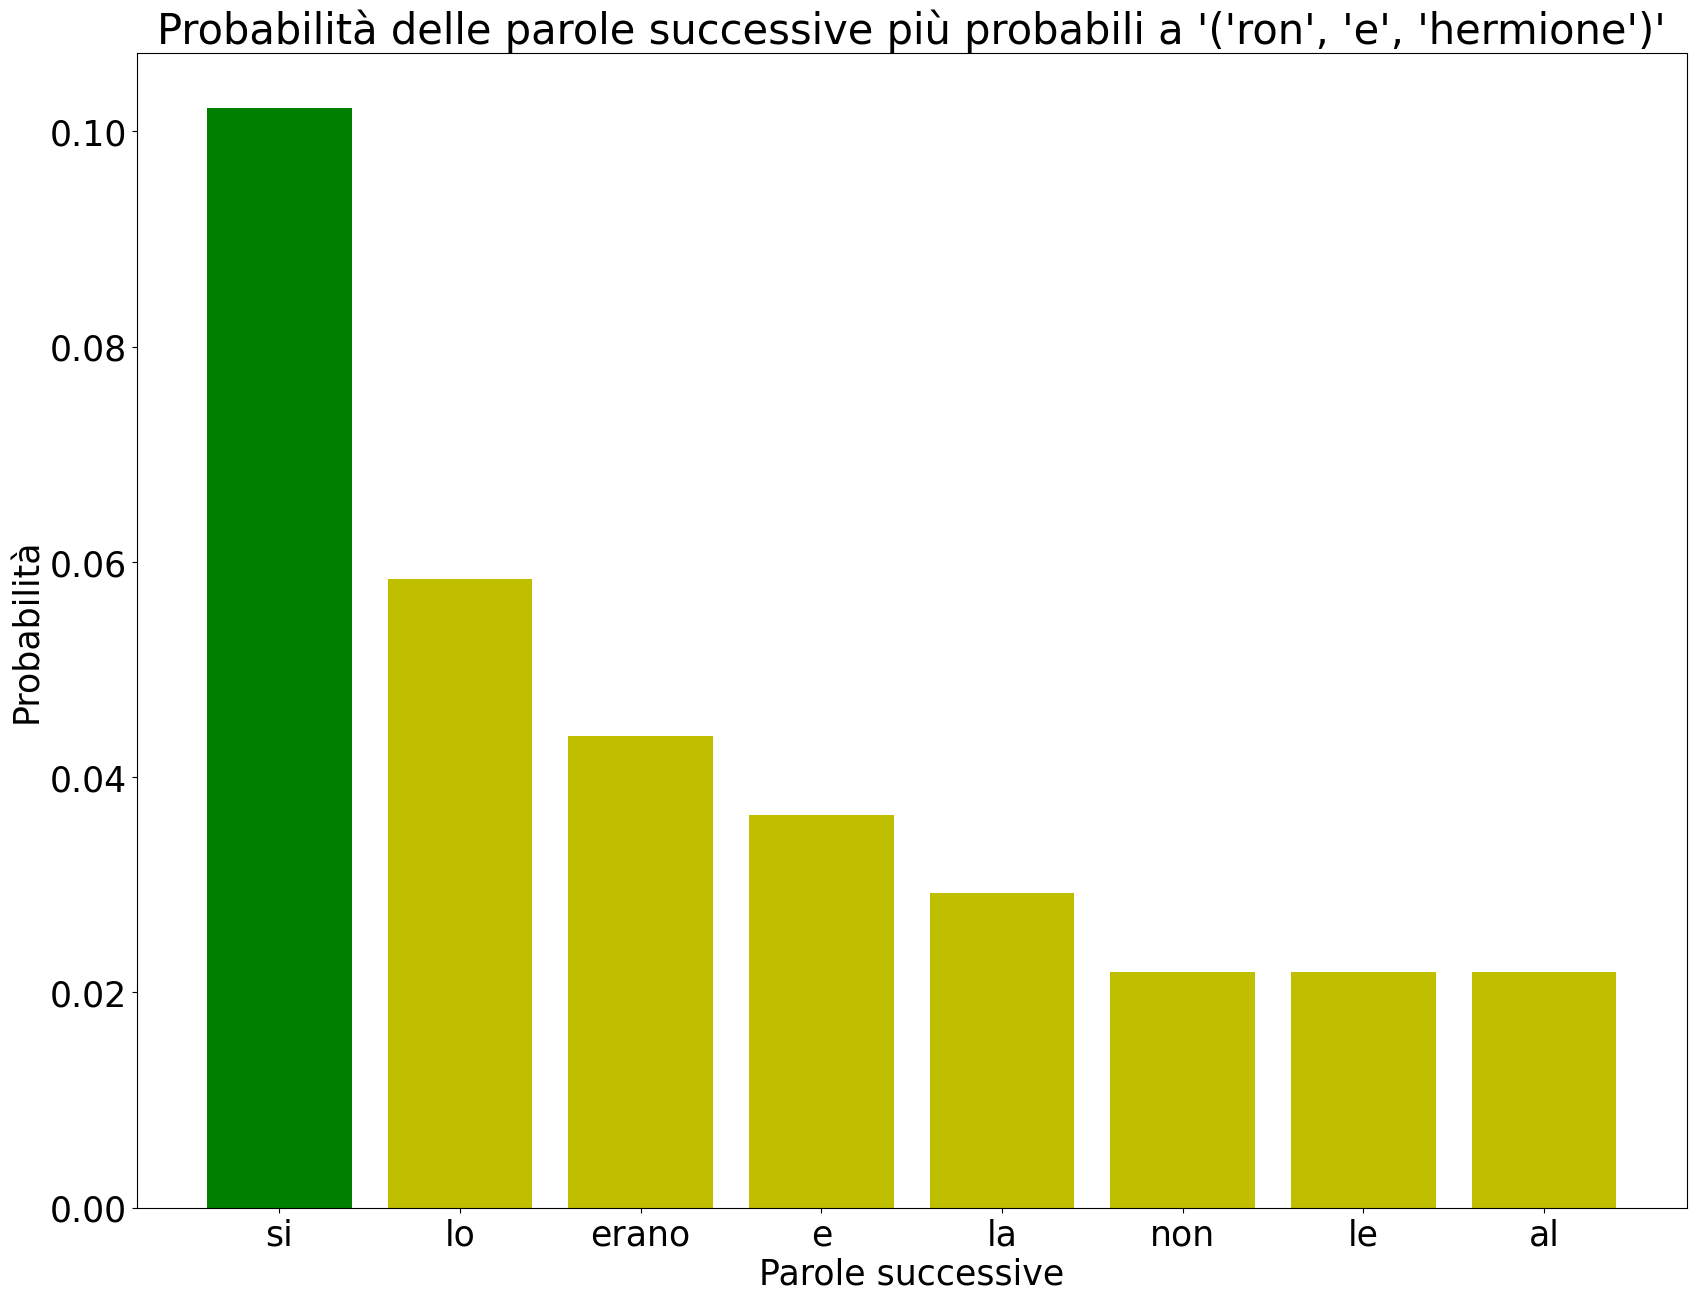

In [10]:
import nltk
from nltk.util import ngrams
import matplotlib.pyplot as plt

# carica il corpus di testo come stringa
with open('hp7.txt', 'r', encoding='utf8') as file:
    text = file.read()

# crea una lista di parole pulita dal testo
words = nltk.word_tokenize(text)
words = [word.lower() for word in words if word.isalpha()]

# crea i trigrammi
trigrams = ngrams(words, 4)

# crea la ConditionalFreqDist
cfd = nltk.ConditionalFreqDist((tuple(trigram[:3]), trigram[3]) for trigram in trigrams)

# calcola le probabilità condizionate
cpd = nltk.ConditionalProbDist(cfd, nltk.MLEProbDist)

# parola da analizzare
word = 'hermione'
prev_words = ('ron', 'e', 'hermione')

# calcola le probabilità per ogni parola possibile
prob_dict = {}
for w in cpd[prev_words].samples():
    prob_dict[w] = cpd[prev_words].prob(w)

# estrai le 3 parole successive più probabili
top_words = sorted(prob_dict.items(), key=lambda x: x[1], reverse=True)[:8]


#ingrandisco il grafico
plt.figure(figsize=(20, 15))


plt.rcParams.update({'font.size': 25})



# imposta i titoli
plt.title(f"Probabilità delle parole successive più probabili a '{prev_words}'")
plt.xlabel('Parole successive')
plt.ylabel('Probabilità')

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.bar([w[0] for w in top_words], [w[1] for w in top_words], color=['g'] + ['y']*(len(top_words)-1))

# visualizza il grafico
plt.show()


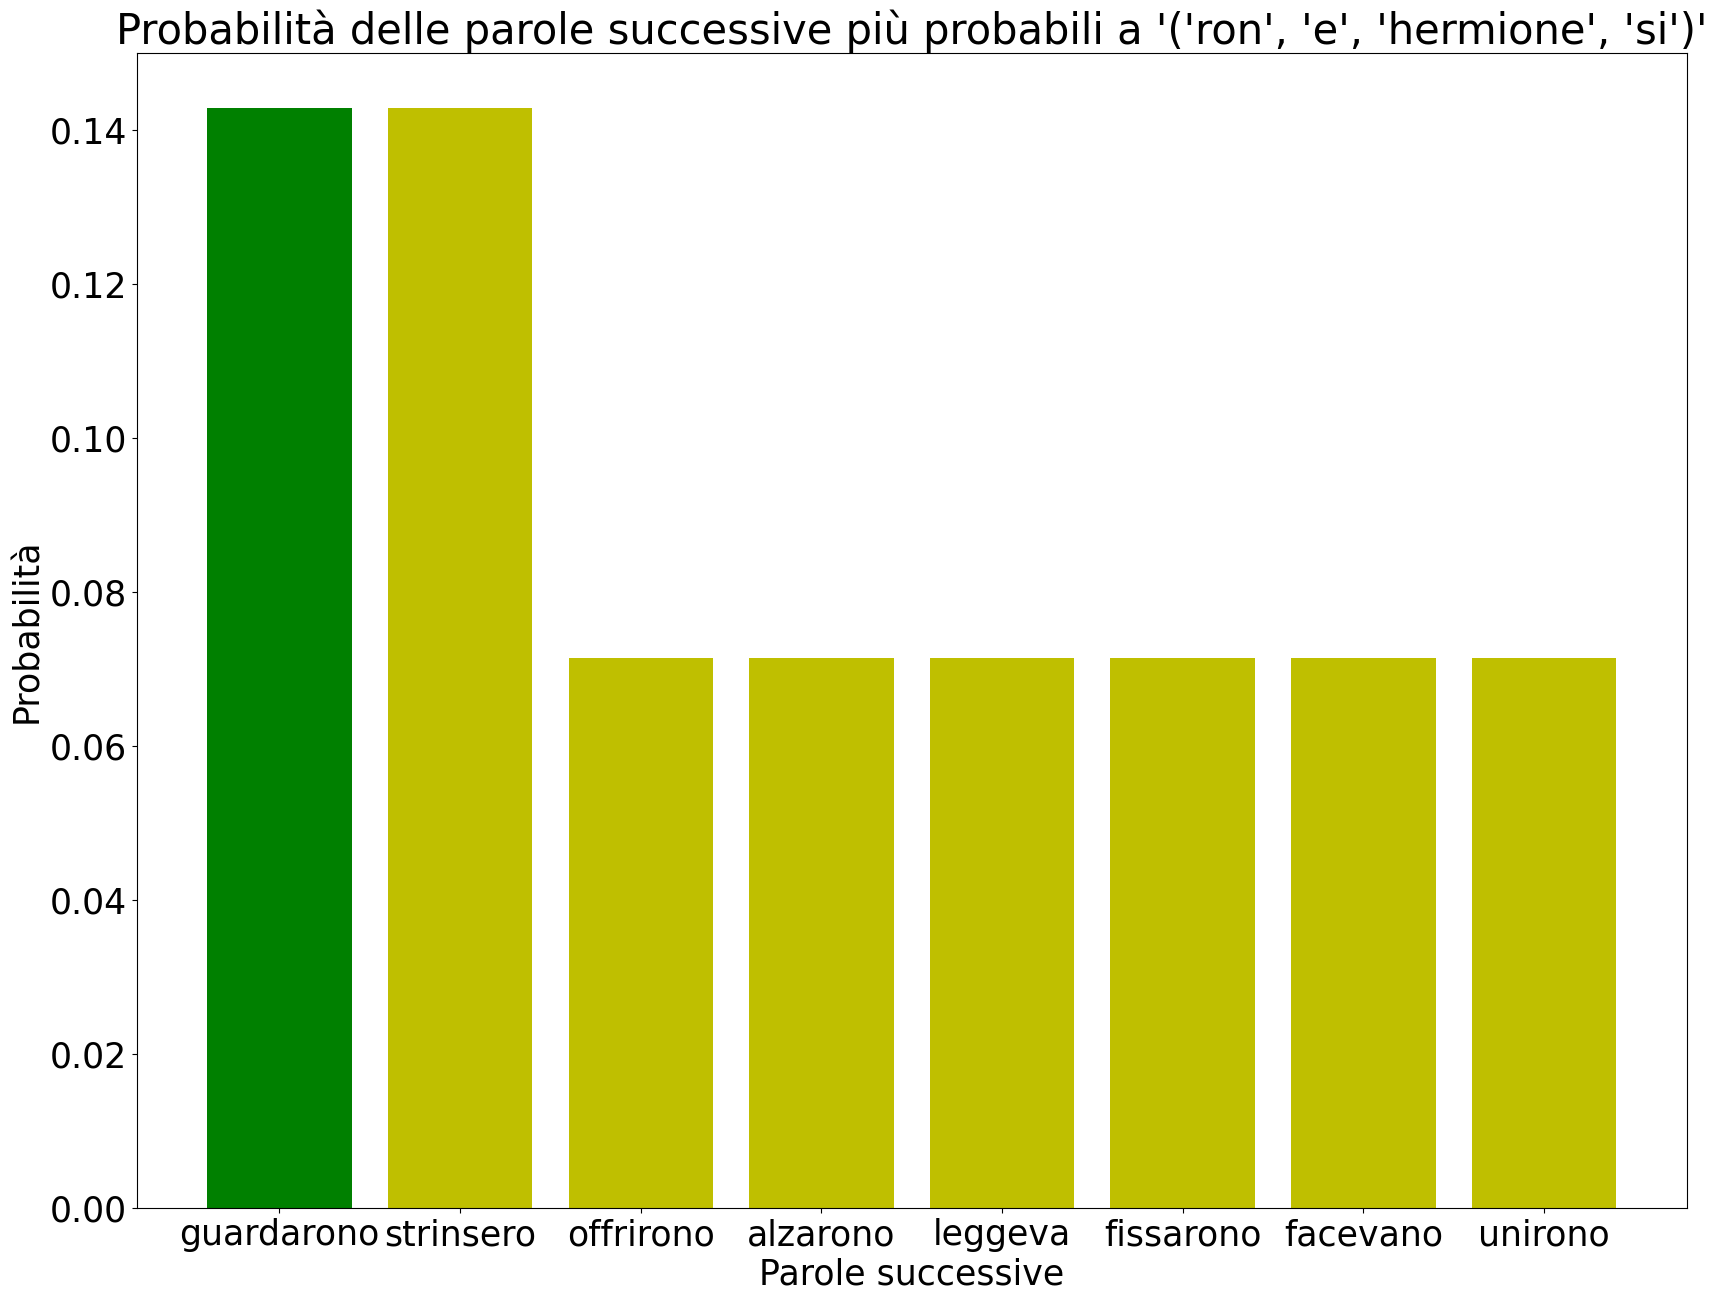

In [11]:
import nltk
from nltk.util import ngrams
import matplotlib.pyplot as plt

# carica il corpus di testo come stringa
with open('hp7.txt', 'r', encoding='utf8') as file:
    text = file.read()

# crea una lista di parole pulita dal testo
words = nltk.word_tokenize(text)
words = [word.lower() for word in words if word.isalpha()]

# crea i trigrammi
trigrams = ngrams(words, 5)

# crea la ConditionalFreqDist
cfd = nltk.ConditionalFreqDist((tuple(trigram[:4]), trigram[4]) for trigram in trigrams)

# calcola le probabilità condizionate
cpd = nltk.ConditionalProbDist(cfd, nltk.MLEProbDist)

# parola da analizzare
word = 'hermione'
prev_words = ('ron', 'e', 'hermione', 'si')

# calcola le probabilità per ogni parola possibile
prob_dict = {}
for w in cpd[prev_words].samples():
    prob_dict[w] = cpd[prev_words].prob(w)

# estrai le 3 parole successive più probabili
top_words = sorted(prob_dict.items(), key=lambda x: x[1], reverse=True)[:8]


#ingrandisco il grafico
plt.figure(figsize=(20, 15))


plt.rcParams.update({'font.size': 25})



# imposta i titoli
plt.title(f"Probabilità delle parole successive più probabili a '{prev_words}'")
plt.xlabel('Parole successive')
plt.ylabel('Probabilità')

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.bar([w[0] for w in top_words], [w[1] for w in top_words], color=['g'] + ['y']*(len(top_words)-1))

# visualizza il grafico
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8f6f71aa-e637-43b2-96e3-a25e57de30f2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>